In [1]:
import os
os.chdir('../')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os

!nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"]="7"

Mon Jun 19 21:15:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.105.01   Driver Version: 515.105.01   CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A5000    Off  | 00000000:1B:00.0 Off |                    0 |
| 30%   26C    P8    13W / 230W |   1480MiB / 23028MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A5000    Off  | 00000000:1C:00.0 Off |                  Off |
| 30%   

### Hyperparams

In [3]:
n_mels = 8
n_outputs = 61
n_frames = 400
sr = 24000
fps = 30
train_csv_files = ['/Storage/speech/face/rvh_viseme2_1_iPhone_raw_30fps.csv',
                   '/Storage/speech/face/rvh_viseme2_2_iPhone_raw_30fps.csv',
                   '/Storage/speech/face/rvh_viseme2_3_iPhone_raw_30fps.csv',
                   '/Storage/speech/face/rvh_viseme2_4_iPhone_raw_30fps.csv',
                  ]
train_wav_files = ['/Storage/speech/face/rvh_viseme2_1_iPhone.wav',
                   '/Storage/speech/face/rvh_viseme2_2_iPhone.wav',
                   '/Storage/speech/face/rvh_viseme2_3_iPhone.wav',
                   '/Storage/speech/face/rvh_viseme2_4_iPhone.wav',
                  ]

test_csv_files = ['/Storage/speech/face/MySlate_6_박수철의_iPhone_30fps.csv']
test_wav_files = ['/Storage/speech/face/MySlate_6_박수철의_iPhone.wav']

### Model

In [4]:
from model.model_reg import Model
from utils.util import *
from tensorboardX import SummaryWriter

step = 0
device = 'cuda:0'

# Model
model = Model(in_dim=n_mels, out_dim=n_outputs)
model = model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
print('done')

done


### Load

In [6]:
save_dir = '/data/scpark/save/lips/train05.19-7/'
!mkdir -p $save_dir
!ls -lt $save_dir

writer = SummaryWriter(save_dir)

if True:
    step, model, _, optimizer = load(save_dir, 33000, model, None, optimizer)

total 3456080
-rw-rw-r-- 1 scpark scpark         0  6월 19 21:16 events.out.tfevents.1687176963.GPUSVR01
-rw-rw-r-- 1 scpark scpark        40  5월 25 12:54 events.out.tfevents.1684948453.GPUSVR01
-rw-rw-r-- 1 scpark scpark     20762  5월 25 12:54 events.out.tfevents.1684948456.GPUSVR01
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 12:27 save_33000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 11:57 save_32000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 11:27 save_31000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 10:56 save_30000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 10:26 save_29000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 09:55 save_28000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 09:24 save_27000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 08:54 save_26000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 08:23 save_25000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 07:53 save_24000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 07:22 save_23000
-rw-rw-r-- 1 scpark scpark 104086387  5월 25 0

In [7]:
import torch
from data.dataset import LipsDataset, Collate

train_dataset = LipsDataset(train_wav_files, train_csv_files, n_frames, n_mels=n_mels, sr=sr, fps=fps, perturb=True)
print('train dataset :', len(train_dataset))
train_loader = torch.utils.data.DataLoader(train_dataset, num_workers=1, shuffle=True, batch_size=8, 
                                           collate_fn=Collate(n_frames, n_mels))
print(train_loader)

test_dataset = LipsDataset(test_wav_files, test_csv_files, n_frames, n_mels=n_mels, sr=sr, fps=fps, perturb=False)
print('test dataset :', len(test_dataset))
test_loader = torch.utils.data.DataLoader(test_dataset, num_workers=1, shuffle=True, batch_size=8,
                                           collate_fn=Collate(n_frames, n_mels))
print(test_loader)

train dataset : 28308
test dataset : 1413


test : 0 0.07350318878889084
test : 1 0.07277467101812363
test : 2 0.07412362843751907
test : 3 0.07434378564357758
test : 4 0.07527848333120346
test : 5 0.07522924989461899
test : 6 0.073642298579216
test : 7 0.07492286711931229
test : 8 0.07314842939376831
test : 9 0.07515782862901688
test_loss : 0.074212446808815


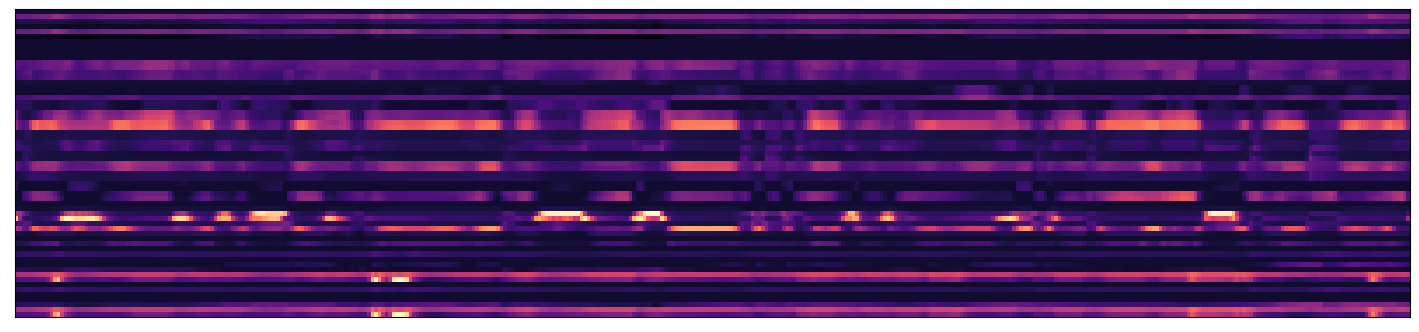

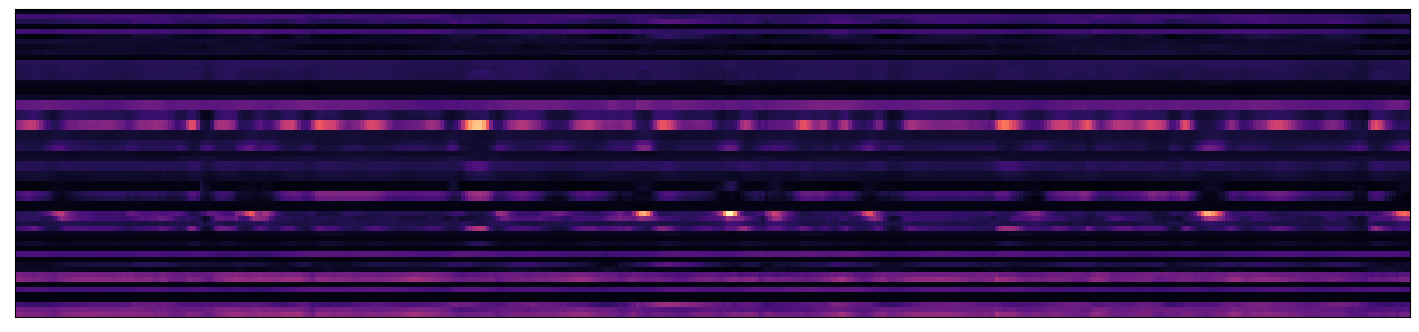

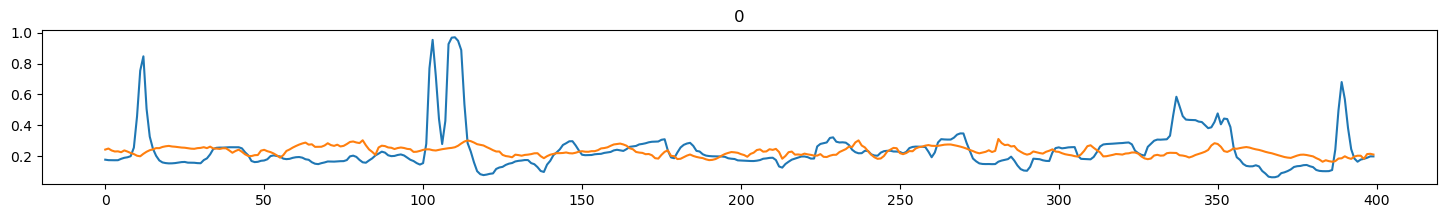

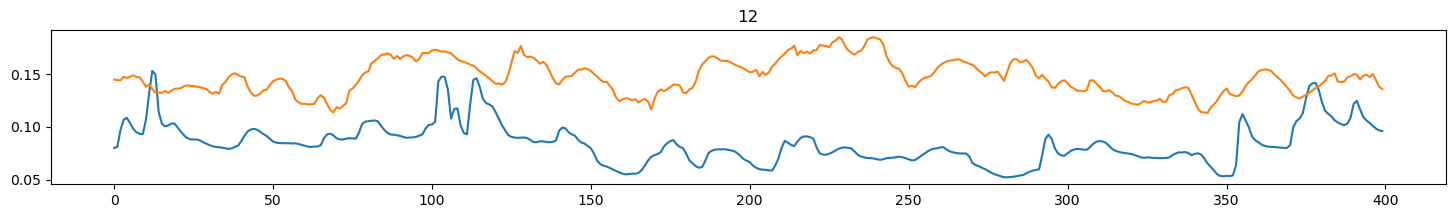

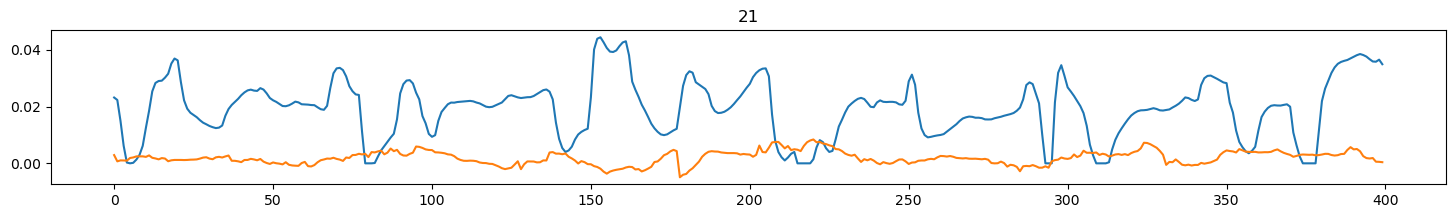

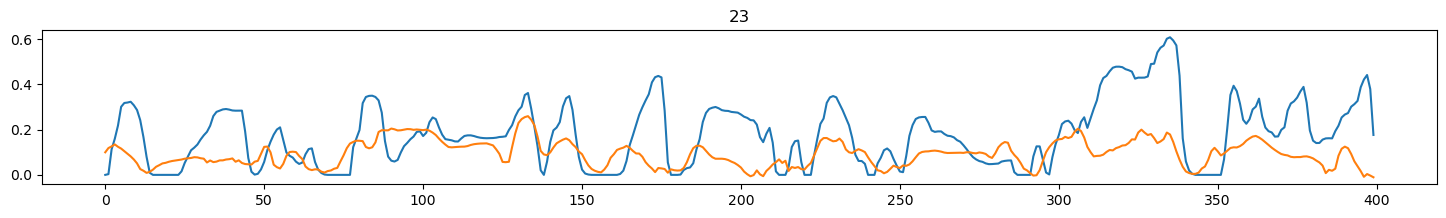

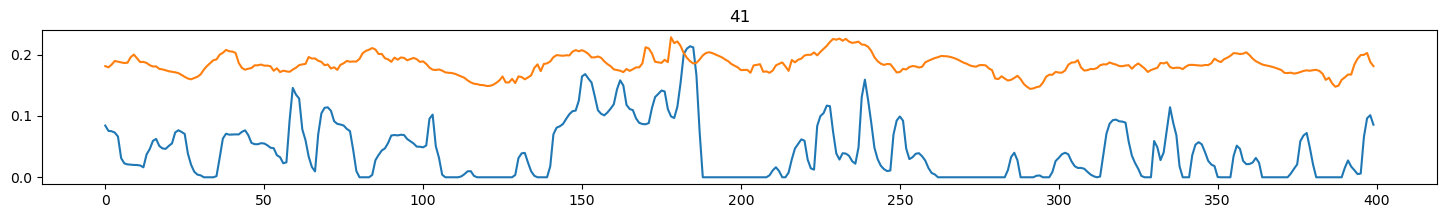

saved /data/scpark/save/lips/train05.19-7/save_34000
34001
loss 0.006939474493265152
34001 0.006939474493265152
34002
loss 0.0074193039909005165
34002 0.0074193039909005165
34003
loss 0.007154908962547779
34003 0.007154908962547779
34004
loss 0.007204464171081781
34004 0.007204464171081781
34005
loss 0.007152706850320101
34005 0.007152706850320101
34006
loss 0.007475267164409161
34006 0.007475267164409161
34007
loss 0.007067512255162001
34007 0.007067512255162001
34008
loss 0.006976960692554712
34008 0.006976960692554712
34009
loss 0.0072080097161233425
34009 0.0072080097161233425
34010
loss 0.008100815117359161
34010 0.008100815117359161
34011
loss 0.00693163275718689
34011 0.00693163275718689
34012
loss 0.006676624994724989
34012 0.006676624994724989
34013
loss 0.006815184839069843
34013 0.006815184839069843
34014
loss 0.007657710928469896
34014 0.007657710928469896
34015
loss 0.006940786726772785
34015 0.006940786726772785
34016
loss 0.0070845927111804485
34016 0.0070845927111804485

In [ ]:
from IPython import display
import librosa.display
import matplotlib.pyplot as plt

isnan = False
while True:
    if isnan:
        break
    for batch in train_loader:
        inputs = batch['inputs'].transpose(1, 2).to(device)
        targets = batch['outputs'].transpose(1, 2).to(device)
        
        model.train()
        model.zero_grad()
        outputs = model(inputs, targets)
        
        print(step)
        loss = 0
        for key in outputs.keys():
            if 'loss' in key:
                loss += outputs[key]
                print(key, outputs[key].item())
        if torch.isnan(loss):
            isnan = True
            break
        loss.backward()
        optimizer.step()
        print(step, loss.item())
        
        if step % 100 == 0:
            writer.add_scalar('train_loss', loss.item(), step)
        
        if step % 100 == 0:
            display.clear_output()
            
            losses = []
            for i, batch in enumerate(test_loader):
                if i >= 10:
                    break
                    
                inputs = batch['inputs'].transpose(1, 2).to(device)
                targets = batch['outputs'].transpose(1, 2).to(device)

                model.eval()
                with torch.no_grad():
                    outputs = model(inputs, targets)
                    
                loss = 0
                for key in outputs.keys():
                    if 'loss' in key:
                        loss += outputs[key]
                print('test :', i, loss.item())
                losses.append(loss)        
            
            test_loss = torch.stack(losses).mean().item()
            print('test_loss :', test_loss)
            writer.add_scalar('test_loss', test_loss, step)
            
            plt.figure(figsize=[18, 4])
            librosa.display.specshow(targets[0].data.cpu().numpy(), cmap='magma')
            plt.show()

            plt.figure(figsize=[18, 4])
            librosa.display.specshow(outputs['y_pred'][0].data.cpu().numpy(), cmap='magma')
            plt.show()
            
            for i in [0, 12, 21, 23, 41]:
                plt.figure(figsize=[18, 2])
                plt.title(str(i))
                plt.plot(targets[0].data.cpu().numpy()[i])
                plt.plot(outputs['y_pred'][0].data.cpu().numpy()[i])
                plt.show()            

        if step % 1000 == 0:
            save(save_dir, step, model, None, optimizer)
    
        step += 1

In [ ]:
save(save_dir, step, model, None, optimizer)